## Librerias importadas

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
import pandas as pd

ModuleNotFoundError: No module named 'cv2'

In [187]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import matplotlib.patches as patches
import matplotlib
%matplotlib inline

## Variables globales

In [2]:
# defining global variable path
image_path = "D:/BREIN"

## Funciones

In [3]:
'''function to load folder into arrays and 
then it returns that same array'''
def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, 'train_img', file)
         for file in os.listdir(path + "/train_img") if      file.endswith('.png')])
 
    return image_files

In [144]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [5]:
# Preprocessing
def processing(data):
    # loading image
    # Getting 3 images to work with 
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    print('Original size',img[0].shape)
    # --------------------------------
    # setting dim of the resize
    height = 256
    width = 256
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)

    # Checcking the size
    print("RESIZED", res_img[1].shape)
    
    # Visualizing one of the images in the array
    original = res_img[1]
    display_one(original)

## Preprocesamiento

In [118]:
df = pd.read_csv('./train.csv')
df.head()

image_id     label
0  train_1a     arroz
1  train_1b  caramelo
2  train_1c     jamon
3  train_1d      cafe
4  train_2a   vinagre

In [6]:
dataset = loadImages(image_path)

In [11]:
print(len(dataset))

3215


In [72]:
img2 = cv2.imread(dataset[0])
im_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print("Type: ", type(im_rgb))
print("dtype: ", im_rgb.dtype)
print("shape: ", im_rgb.shape)

Type:  <class 'numpy.ndarray'>
dtype:  uint8
shape:  (256, 256, 3)


In [183]:
ncategories=dict()
for i in range(len(df[:])):
    if df.iloc[i]['label'] in ncategories:
        ncategories[df.iloc[i]['label']] = ncategories[df.iloc[i]['label']]+[df.iloc[i]['image_id']]
    else:
        ncategories[df.iloc[i]['label']] = [df.iloc[i]['image_id']]
for k in sorted(ncategories, key=lambda k: len(ncategories[k]), reverse=False):
    print (k,": ",len(ncategories[k]))

maiz :  63
harina :  71
pescado :  71
azucar :  77
frijoles :  88
aceite :  93
arroz :  97
vinagre :  102
leche :  105
torta :  105
nueces :  109
salsatomate :  111
pasta :  112
gaseosa :  115
chips :  118
miel :  120
especias :  135
jamon :  157
agua :  170
cereal :  181
te :  184
cafe :  194
jugo :  196
chocolate :  199
caramelo :  242


### Muchas clases con rango de imágenes entre 63~242. No son muchas imágenes por clase y son muchas clases a clasificar.

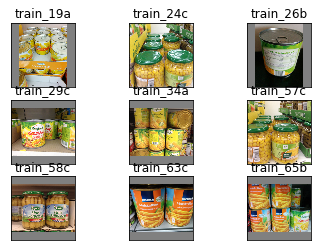

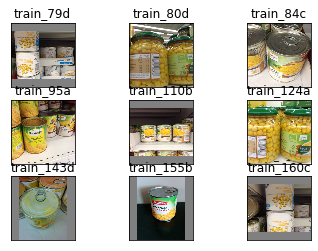

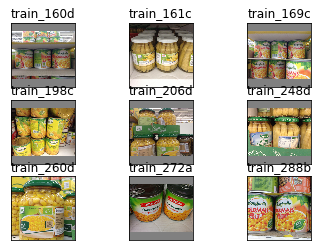

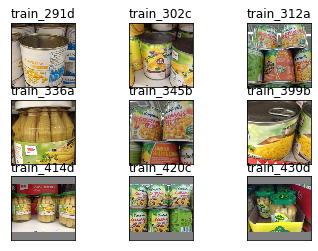

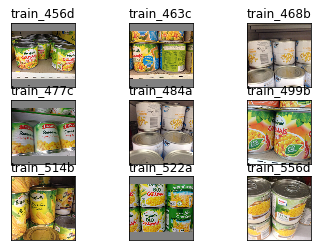

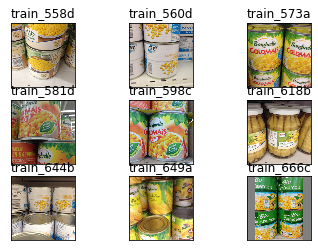

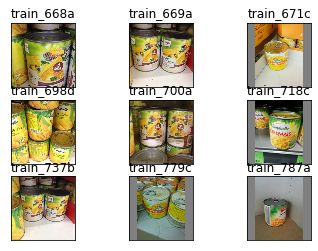

In [188]:
x=1
for i in ncategories['maiz']:
    img = imageio.imread('D:/BREIN/train_img/'+i+'.png')
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,x), plt.imshow(img), plt.title(i)
    plt.xticks([]), plt.yticks([])
    x = x+1
    if x%10==0:
        x=1
        plt.show()

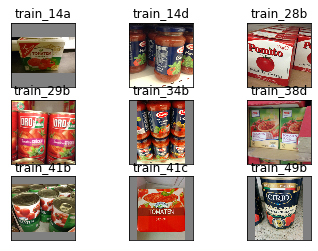

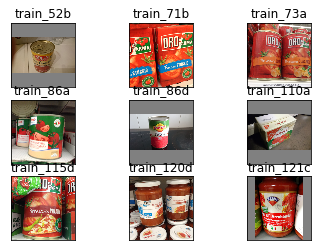

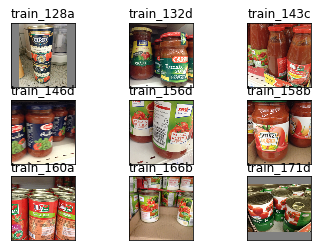

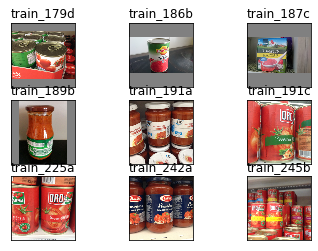

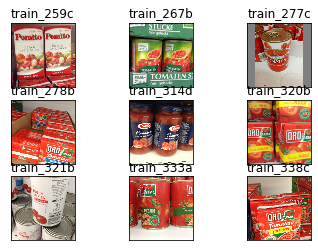

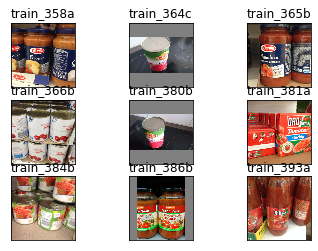

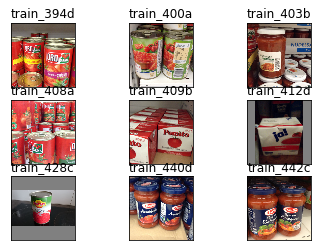

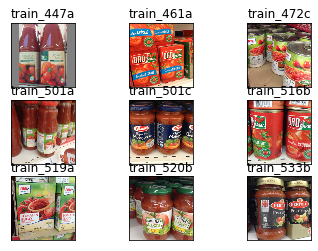

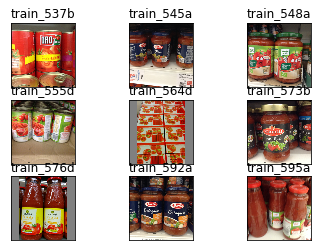

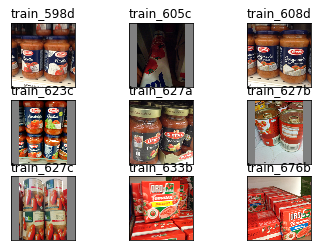

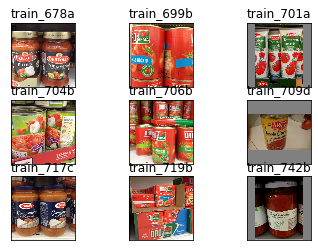

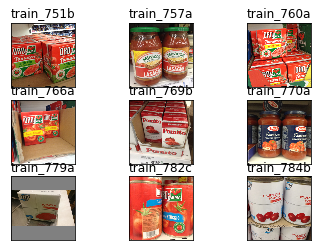

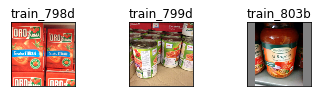

In [189]:
x=1
for i in ncategories['salsatomate']:
    img = imageio.imread('D:/BREIN/train_img/'+i+'.png')
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,x), plt.imshow(img), plt.title(i)
    plt.xticks([]), plt.yticks([])
    x = x+1
    if x%10==0:
        x=1
        plt.show()

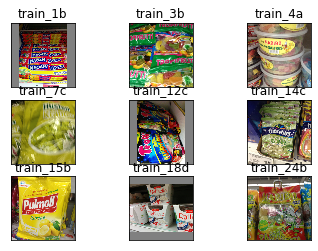

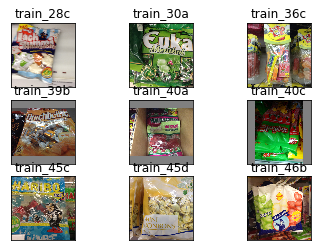

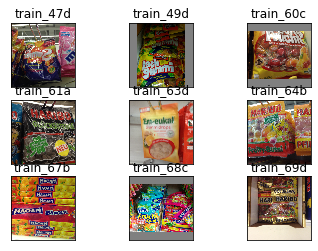

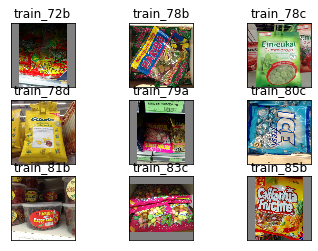

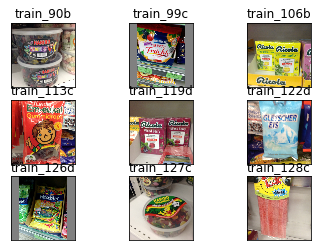

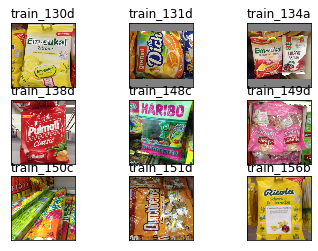

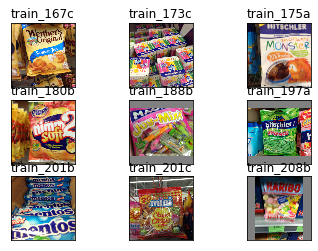

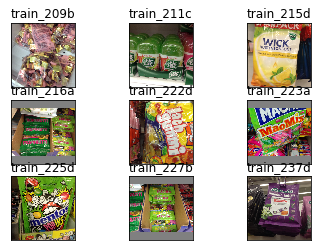

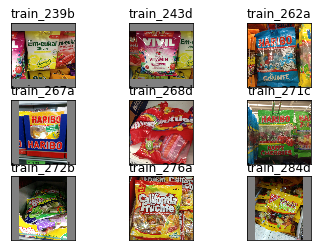

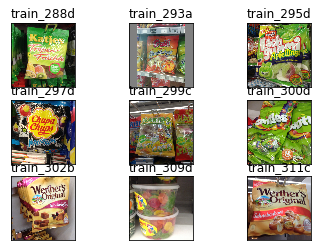

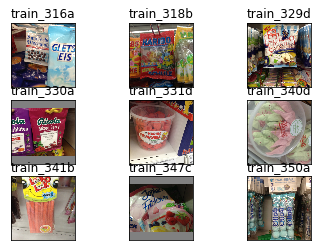

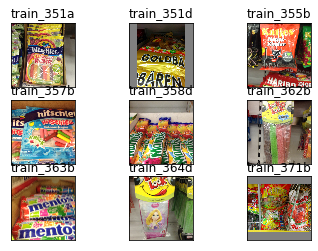

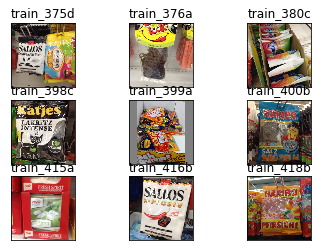

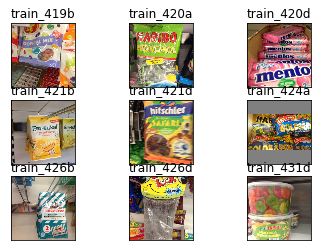

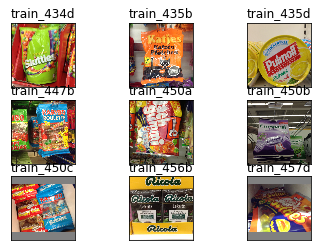

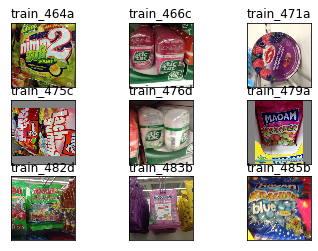

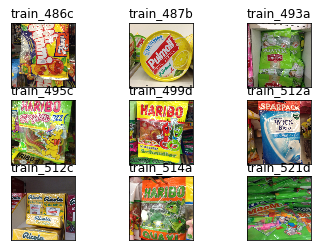

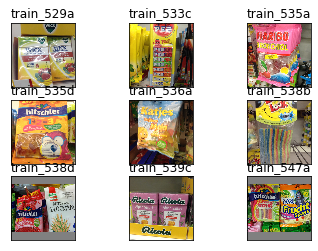

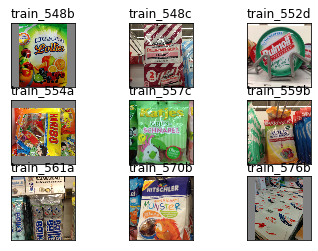

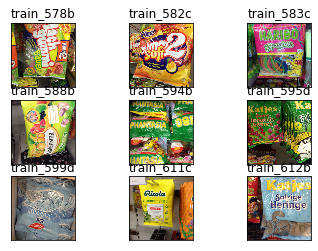

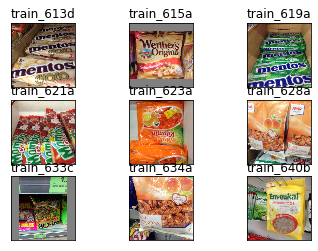

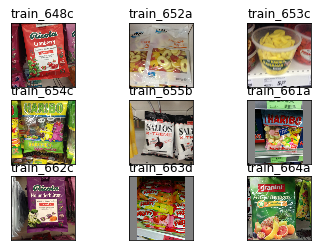

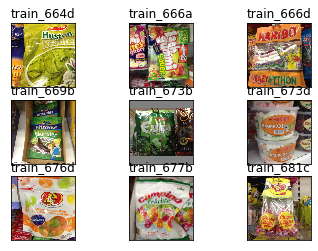

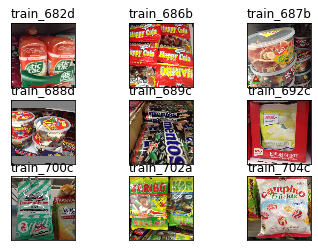

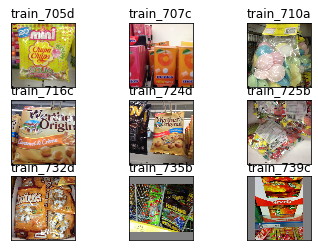

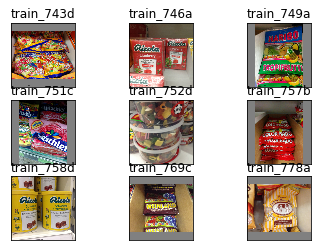

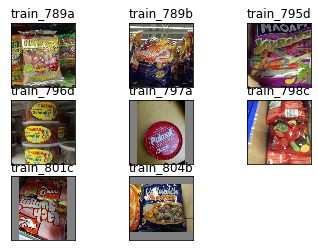

In [210]:
x=1
for i in ncategories['caramelo']:
    img = imageio.imread('D:/BREIN/train_img/'+i+'.png')
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,x), plt.imshow(img), plt.title(i)
    plt.xticks([]), plt.yticks([])
    x = x+1
    if x%10==0:
        x=1
        plt.show()

### Hay colores representativos para algunas clases. Por lo tanto, no conviene convertir las imágenes a escala de grises ya que los colores sí pueden influir en la clasificación del modelo

## Tipos de Data Augmentation

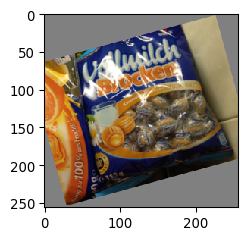

In [281]:
# Rotate
#cval cambia el color de los nuevos pixeles creados
rotate=iaa.Affine(rotate=(-50, 30),cval=128)
rotated_image=rotate.augment_image(img)
ia.imshow(rotated_image)

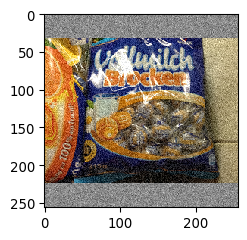

In [216]:
# Gaussian blur
gaussian_noise=iaa.AdditiveGaussianNoise(10,20)
noise_image=gaussian_noise.augment_image(img)
ia.imshow(noise_image)

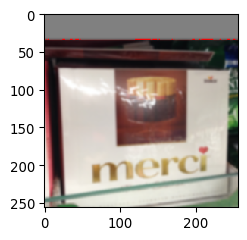

In [196]:
# Cropping
crop = iaa.Crop(percent=(0, 0.3)) # crop image
corp_image=crop.augment_image(img)
ia.imshow(corp_image)

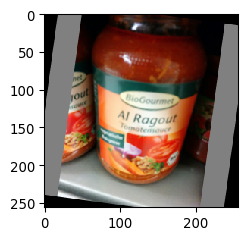

In [198]:
# Shearing
shear = iaa.Affine(shear=(0,40),cval=128)
shear_image=shear.augment_image(img)
ia.imshow(shear_image)

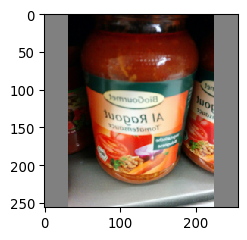

In [202]:
# Flipping horizontally
#flipping image horizontally
flip_hr=iaa.Fliplr(p=1.0)
flip_hr_image= flip_hr.augment_image(img)
ia.imshow(flip_hr_image)

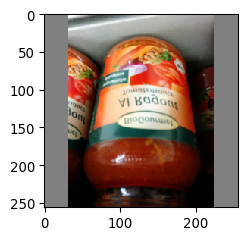

In [201]:
# Flipping vertically
flip_vr=iaa.Flipud(p=1.0)
flip_vr_image= flip_vr.augment_image(img)
ia.imshow(flip_vr_image)

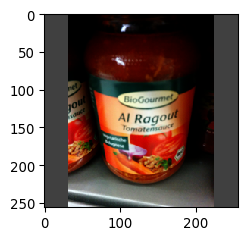

In [203]:
# Bright
contrast=iaa.GammaContrast(gamma=2.0)
contrast_image =contrast.augment_image(img)
ia.imshow(contrast_image)

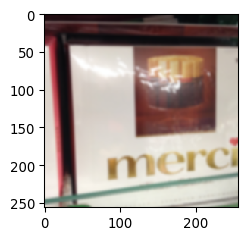

(256, 256, 3)


In [208]:
# Scale
scale_im=iaa.Affine(scale={"x": (1.5, 1.0), "y": (1.5, 1.0)})
scale_image =scale_im.augment_image(image)
ia.imshow(scale_image)
print(scale_image.shape)

### No conviene los flips horizontales ni verticales, ya que la ligera posibilidad de que el modelo aprenda a leer las marcas, lo vuelve mas complejo, logrando efectos similares girando. Por otro lado, el flip generaliza la forma sobre el background.
### El brightness tambien modifica el color gris de fondo
### Además, el uso de gaussian noise podría no ser producente por la categoria candies, tal vez salt and pepper

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms

RuntimeError: class '__torch__.torchvision.models.detection._utils.BalancedPositiveNegativeSampler' already defined. (register_type at C:\w\1\s\tmp_conda_3.7_104508\conda\conda-bld\pytorch_1572950778684\work\torch/csrc/jit/script/compilation_unit.h:166)
(no backtrace available)

In [2]:
# Parameters and DataLoaders

batch_size = 30

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

<Figure size 640x480 with 1 Axes>

plane horse  frog  frog


In [1]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  net = nn.DataParallel(net)
net.to(device)

NameError: name 'torch' is not defined

In [3]:
model = torch.hub.load('pytorch/vision:v0.5.0', 'inception_v3', pretrained=False)
model.eval()

Using cache found in C:\Users\carra/.cache\torch\hub\pytorch_vision_v0.5.0


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [12]:
#pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(pytorch_total_params)

27161264


In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [15]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

NameError: name 'trainloader' is not defined

In [ ]:
PATH = './inceptionv3_net.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net()
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  net = nn.DataParallel(net)
net.to(device)
net.load_state_dict(torch.load(PATH))
net.eval()

In [11]:
outputs = net(images)

In [12]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car  ship


In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 57 %
Accuracy of   car : 61 %
Accuracy of  bird : 38 %
Accuracy of   cat : 40 %
Accuracy of  deer : 47 %
Accuracy of   dog : 54 %
Accuracy of  frog : 68 %
Accuracy of horse : 63 %
Accuracy of  ship : 70 %
Accuracy of truck : 59 %


In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [16]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [17]:
inputs, labels = data[0].to(device), data[1].to(device)